In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

### Reading the data

In [126]:
df1 = pd.read_csv('poetry.csv')
df1.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [127]:
df1.shape

(573, 5)

In [128]:
df1.isnull().sum()

author       0
content      0
poem name    2
age          0
type         0
dtype: int64

In [129]:
df1['author'].nunique()

67

<Axes: xlabel='age', ylabel='count'>

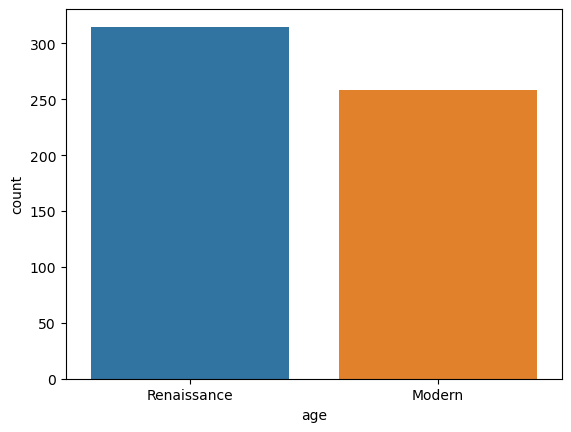

In [130]:
sns.countplot(df1, x = 'age')

<Axes: xlabel='type', ylabel='count'>

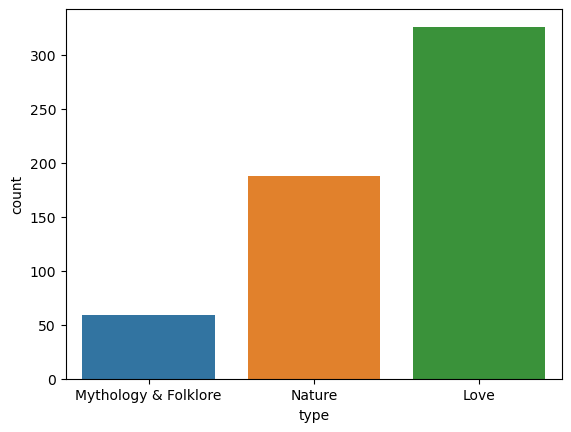

In [131]:
sns.countplot(df1, x = 'type')

In [132]:
df2 = pd.read_csv('archive/ready_poems.csv')

In [133]:
df2.head()

,Unnamed: 0,title,author,content,tags
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[]
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[]
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,[]
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[]
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[]


In [134]:
df2['author'].nunique()

5477

In [135]:
df2.shape

(26122, 5)

In [136]:
author_age = df1[['author','age']].drop_duplicates()
author_age

,author,age
0,WILLIAM SHAKESPEARE,Renaissance
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,Renaissance
2,THOMAS BASTARD,Renaissance
3,EDMUND SPENSER,Renaissance
4,RICHARD BARNFIELD,Renaissance
...,...,...
425,KATHERINE MANSFIELD,Modern
461,T. S. ELIOT,Modern
504,GERTRUDE STEIN,Modern
507,JAMES JOYCE,Modern


In [137]:
author_age['author'] = author_age['author'].str.lower()
author_age

,author,age
0,william shakespeare,Renaissance
1,duchess of newcastle margaret cavendish,Renaissance
2,thomas bastard,Renaissance
3,edmund spenser,Renaissance
4,richard barnfield,Renaissance
...,...,...
425,katherine mansfield,Modern
461,t. s. eliot,Modern
504,gertrude stein,Modern
507,james joyce,Modern


In [138]:
df2['author_ab'] = df2['author'].str.lower()
df2.head()

,Unnamed: 0,title,author,content,tags,author_ab
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[],dylan thomas
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[],elizabeth barrett browning
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,[],william shakespeare
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[],rudyard kipling
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[],robert frost


In [139]:
set(author_age['author'])-set(df2['author_ab'])

{'asil bunting', 'en jonson', 'robert southwell, sj'}

In [140]:
set(df2['author_ab'])

{'brenda cárdenas',
 'lance phillips',
 'dannie abse',
 'alan felsenthal',
 'frank lima',
 'izumi shikibu',
 'iyaw&oacute; (kristin naca)',
 'nkosi nkululeko',
 'zitkála-šá',
 'mahtem  shiferraw',
 'divya victor',
 'tara bray',
 'karla k. morton',
 'frank osen',
 'henry gould',
 'matthew wimberley',
 'matthew arnold',
 'susan kinsolving',
 'adonis',
 'michael sowder',
 'barbara crooker',
 'jeanne murray walker',
 'harry mathews',
 'rob schlegel',
 'jean follain',
 'melissa stein',
 'veronica patterson',
 'john engels',
 'les murray',
 'joshua clover',
 'jeff hoffman',
 'david elliott',
 'j. m. synge',
 'eric nelson',
 'frank asch',
 'claire malroux',
 'j. jennifer espinoza',
 'bill coyle',
 'anni liu',
 'anthony opal',
 'joseph campbell',
 'henry wadsworth longfellow',
 'john logan',
 'bruce lansky',
 'michael ryan',
 'mónica teresa ortiz',
 'jacob polley',
 'isaac rosenberg',
 'rusty morrison',
 'matt hart',
 'carol light',
 'william archila',
 'collier nogues',
 'vidyan ravinthiran',

In [141]:
for i in list(set(df2['author_ab'])):
    if 'jonson' in str(i):
        print(i)

ben jonson


In [142]:
for i in list(set(df2['author_ab'])):
    if 'southwell' in str(i):
        print(i)

robert southwell sj


In [143]:
for i in list(set(df2['author_ab'])):
    if 'bunting' in str(i):
        print(i)

basil bunting


In [144]:
author_age['author'] = author_age['author'].replace({'en jonson': 'ben jonson', 'asil bunting': 'basil bunting',
                                                    'robert southwell, sj': 'robert southwell sj'})

In [145]:
author_age

,author,age
0,william shakespeare,Renaissance
1,duchess of newcastle margaret cavendish,Renaissance
2,thomas bastard,Renaissance
3,edmund spenser,Renaissance
4,richard barnfield,Renaissance
...,...,...
425,katherine mansfield,Modern
461,t. s. eliot,Modern
504,gertrude stein,Modern
507,james joyce,Modern


In [146]:
df2 = pd.merge(df2,author_age, how = 'left', left_on = 'author_ab',right_on = 'author')
df2.head()

,Unnamed: 0,title,author_x,content,tags,author_ab,author_y,age
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[],dylan thomas,NaN,NaN
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[],elizabeth barrett browning,NaN,NaN
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,[],william shakespeare,william shakespeare,Renaissance
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[],rudyard kipling,NaN,NaN
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[],robert frost,NaN,NaN


In [147]:
df3 = df2[~(df2['age'].isnull())]

In [148]:
df3.shape

(1363, 8)

In [150]:
df3['author_x'].nunique()

67

In [151]:
df4 = df2[(df2['age'].isnull())]

In [152]:
df4.head()

,Unnamed: 0,title,author_x,content,tags,author_ab,author_y,age
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[],dylan thomas,NaN,NaN
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[],elizabeth barrett browning,NaN,NaN
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[],rudyard kipling,NaN,NaN
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[],robert frost,NaN,NaN
5,5,I’m Nobody! Who are you? (260),Emily Dickinson,i am nobody who are you NEWLINE are you nobody...,[],emily dickinson,NaN,NaN


In [153]:
df4['author_x'].value_counts()

Walt Whitman        160
Langston Hughes     111
Robert Frost        104
Emily Dickinson     103
Dorothy Parker       91
                   ... 
Jack Jung             1
Bruce Willard         1
Natasha Oladokun      1
Ben Kline             1
Lindsay Sletten       1
Name: author_x, Length: 5410, dtype: int64

In [154]:
len(set(df1['poem name']).union(set(df3['title'])))

1501

In [155]:
pd.DataFrame(df4['author_ab'].value_counts()).head(50).index

Index(['walt whitman', 'langston hughes', 'robert frost', 'emily dickinson',
       'dorothy parker', 'alfred, lord tennyson', 'countee cullen',
       'ameen rihani', 'anonymous', 'william wordsworth', 'jane hirshfield',
       'amy lowell', 'william topaz mcgonagall', 'rae armantrout',
       'thomas hardy', 'edna st. vincent millay', 'edgar allan poe',
       'naomi shihab nye', 'herman melville', 'claude mckay', 'john ashbery',
       'yusef komunyakaa', 'emily pauline johnson', 'william blake',
       'christina rossetti', 'percy bysshe shelley',
       'henry wadsworth longfellow', 'george meredith', 'john keats',
       'elsa gidlow ', 'robert herrick', 'robert browning',
       'william carlos williams', 'marilyn nelson', 'dean young', 'rita dove',
       'john milton', 'elizabeth barrett browning', 'brenda hillman',
       'philip freneau', 'juan felipe herrera', 'a. e. housman', 'arthur sze',
       'alice notley', 'carl phillips', 'algernon charles swinburne', 'h. d.',
     

In [156]:
# Renaissance Poets
renaissance_poets = [
    'william wordsworth', 'william blake', 'christina rossetti',
    'percy bysshe shelley', 'henry wadsworth longfellow', 'john keats',
    'robert herrick', 'robert browning', 'john milton',
    'elizabeth barrett browning', 'algernon charles swinburne', 'samuel taylor coleridge',
    'w. b. yeats'
]

# Modern Poets
modern_poets = [
    'walt whitman', 'langston hughes', 'robert frost', 'emily dickinson',
    'dorothy parker', 'alfred, lord tennyson', 'countee cullen', 'ameen rihani',
    'anonymous', 'jane hirshfield', 'amy lowell', 'william topaz mcgonagall',
    'rae armantrout', 'thomas hardy', 'edna st. vincent millay', 'edgar allan poe',
    'naomi shihab nye', 'herman melville', 'claude mckay', 'john ashbery',
    'yusef komunyakaa', 'emily pauline johnson', 'george meredith', 'elsa gidlow',
    'william carlos williams', 'marilyn nelson', 'dean young', 'rita dove',
    'john milton', 'elizabeth barrett browning', 'brenda hillman', 'philip freneau',
    'juan felipe herrera', 'a. e. housman', 'arthur sze', 'alice notley',
    'carl phillips', 'algernon charles swinburne', 'h. d.', 'w. s. merwin'
]


print("Renaissance Poets:", renaissance_poets)
print("\nModern Poets:", modern_poets)


Renaissance Poets: ['william wordsworth', 'william blake', 'christina rossetti', 'percy bysshe shelley', 'henry wadsworth longfellow', 'john keats', 'robert herrick', 'robert browning', 'john milton', 'elizabeth barrett browning', 'algernon charles swinburne', 'samuel taylor coleridge', 'w. b. yeats']

Modern Poets: ['walt whitman', 'langston hughes', 'robert frost', 'emily dickinson', 'dorothy parker', 'alfred, lord tennyson', 'countee cullen', 'ameen rihani', 'anonymous', 'jane hirshfield', 'amy lowell', 'william topaz mcgonagall', 'rae armantrout', 'thomas hardy', 'edna st. vincent millay', 'edgar allan poe', 'naomi shihab nye', 'herman melville', 'claude mckay', 'john ashbery', 'yusef komunyakaa', 'emily pauline johnson', 'george meredith', 'elsa gidlow', 'william carlos williams', 'marilyn nelson', 'dean young', 'rita dove', 'john milton', 'elizabeth barrett browning', 'brenda hillman', 'philip freneau', 'juan felipe herrera', 'a. e. housman', 'arthur sze', 'alice notley', 'carl p

In [157]:
df4.head()

,Unnamed: 0,title,author_x,content,tags,author_ab,author_y,age
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[],dylan thomas,NaN,NaN
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[],elizabeth barrett browning,NaN,NaN
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[],rudyard kipling,NaN,NaN
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[],robert frost,NaN,NaN
5,5,I’m Nobody! Who are you? (260),Emily Dickinson,i am nobody who are you NEWLINE are you nobody...,[],emily dickinson,NaN,NaN


In [158]:
df4['age'] = df4['author_ab'].apply(lambda x: 'Renaissance' if x in renaissance_poets else ('Modern' if x in modern_poets
                                                                                        else np.nan))
df4.head()

/var/folders/_2/d61kw_gs56z84_px9_4y5sk00000gp/T/ipykernel_91317/4114182098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age'] = df4['author_ab'].apply(lambda x: 'Renaissance' if x in renaissance_poets else ('Modern' if x in modern_poets


,Unnamed: 0,title,author_x,content,tags,author_ab,author_y,age
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[],dylan thomas,NaN,NaN
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[],elizabeth barrett browning,NaN,Renaissance
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[],rudyard kipling,NaN,NaN
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[],robert frost,NaN,Modern
5,5,I’m Nobody! Who are you? (260),Emily Dickinson,i am nobody who are you NEWLINE are you nobody...,[],emily dickinson,NaN,Modern


In [159]:
df4.head()

,Unnamed: 0,title,author_x,content,tags,author_ab,author_y,age
0,0,Do not go gentle into that good night,Dylan Thomas,do not go gentle into that good night NEWLINE ...,[],dylan thomas,NaN,NaN
1,1,How Do I Love Thee? (Sonnet 43),Elizabeth Barrett Browning,how do i love thee let me count the ways NEWLI...,[],elizabeth barrett browning,NaN,Renaissance
3,3,If—,Rudyard Kipling,if you can keep your head when all about you N...,[],rudyard kipling,NaN,NaN
4,4,Nothing Gold Can Stay,Robert Frost,natures first green is gold NEWLINE her hardes...,[],robert frost,NaN,Modern
5,5,I’m Nobody! Who are you? (260),Emily Dickinson,i am nobody who are you NEWLINE are you nobody...,[],emily dickinson,NaN,Modern


In [169]:
df5 = pd.concat([df3, df4[~(df4['age'].isnull())]])

In [170]:
df5.shape

(4265, 8)

In [171]:
df3.shape

(1363, 8)

In [172]:
df4[~(df4['age'].isnull())].shape

(2902, 8)

In [173]:
df5.head()

,Unnamed: 0,title,author_x,content,tags,author_ab,author_y,age
2,2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,[],william shakespeare,william shakespeare,Renaissance
24,24,"Batter my heart, three person&#039;d God (Holy...",John Donne,batter my heart three personed god for you NEW...,[],john donne,john donne,Renaissance
25,25,"Hamlet, Act III, Scene I [To be, or not to be]",William Shakespeare,to be or not to be that is the question NEWLIN...,[],william shakespeare,william shakespeare,Renaissance
32,32,[since feeling is first],E. E. Cummings,since feeling is first NEWLINE who pays any at...,[],e. e. cummings,e. e. cummings,Modern
35,35,"somewhere i have never travelled,gladly beyond",E. E. Cummings,somewhere i have never travelled gladly beyond...,[],e. e. cummings,e. e. cummings,Modern


In [174]:
df5 = df5[['title','author_x','content','age','tags']]
df5.head()

,title,author_x,content,age,tags
2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,Renaissance,[]
24,"Batter my heart, three person&#039;d God (Holy...",John Donne,batter my heart three personed god for you NEW...,Renaissance,[]
25,"Hamlet, Act III, Scene I [To be, or not to be]",William Shakespeare,to be or not to be that is the question NEWLIN...,Renaissance,[]
32,[since feeling is first],E. E. Cummings,since feeling is first NEWLINE who pays any at...,Modern,[]
35,"somewhere i have never travelled,gladly beyond",E. E. Cummings,somewhere i have never travelled gladly beyond...,Modern,[]


In [175]:
df1.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [176]:
df5.columns = ['poem name','author','content','age','type']
df5.shape

(4265, 5)

In [177]:
df5.head()

,poem name,author,content,age,type
2,Shall I compare thee to a summer’s day? (Sonne...,William Shakespeare,shall i compare thee to a summers day NEWLINE ...,Renaissance,[]
24,"Batter my heart, three person&#039;d God (Holy...",John Donne,batter my heart three personed god for you NEW...,Renaissance,[]
25,"Hamlet, Act III, Scene I [To be, or not to be]",William Shakespeare,to be or not to be that is the question NEWLIN...,Renaissance,[]
32,[since feeling is first],E. E. Cummings,since feeling is first NEWLINE who pays any at...,Modern,[]
35,"somewhere i have never travelled,gladly beyond",E. E. Cummings,somewhere i have never travelled gladly beyond...,Modern,[]


In [178]:
df = pd.concat([df1,df5])
df.shape

(4838, 5)

In [180]:
df.tail()

,author,content,poem name,age,type
26117,Edgar Allan Poe,dim vales and shadowy floods NEWLINE and cloud...,Fairyland,Modern,[]
26118,Edgar Allan Poe,the happiest day the happiest hour NEWLINE my ...,The Happiest Day,Modern,[]
26119,Edgar Allan Poe,wreathed in myrtle my sword i will conceal NEW...,Hymn To Aristogeiton And Harmodius,Modern,[]
26120,Edgar Allan Poe,how often we forget all time when lone NEWLINE...,In Youth I Have Known One,Modern,[]
26121,Edgar Allan Poe,how shall the burial rite be read NEWLINE the ...,A Pæan,Modern,[]


In [181]:
df.to_csv('Poems_Author_Age.csv',index = False)